<a href="https://colab.research.google.com/github/folamhmark/WORKSHOP-AI-2019-hometask-/blob/master/Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
# Урок 3

## Часть 1

На прошлом занятии мы построили двухслойную нейросеть (она же нейросеть с одним скрытым слоем) для задачи бинарной классификации (мы предсказывали цвет точки из двумерного пространства в зависимости от ее координат). По сравнению с логистической регрессией качество существенно возросло. 

Тем не менее, такая модель не подходит для более сложных задач или более сложного распределения данных. На этом уроке мы будем строить n-слойные нейросети. Перед этим вспомним формулы прошлого урока:

$\textbf{Forward propagation:}$

$$ z^{[1]} = W^{[1]}\cdot x + b^{[1]} \tag{1.1}$$

$$ a^{[1]} = \sigma^{[1]} (z^{[1]}) \tag{1.2}$$

$$ z^{[2]} = W^{[2]} \cdot a^{[1]} + b^{[2]} \tag{1.3} $$

$$ a^{[2]} = \sigma^{[2]} (z^{[2]}) \tag{1.4} $$

$$ J(a^{[2]}, y) = ... \tag{1.5}$$

$$ y = threshold(a^{[2]}). \tag{1.6}$$

$\textbf{Backward propagation:}$

Минимизируем следующую функцию ошибки:
$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{2.1}$$


$$dz^{[2]} = a^{[2]}-y \tag{2.2}$$

$$dw^{[2]} = \frac{\partial J}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial w^{[2]}}  = \frac{1}{m}\cdot dz^{[2]} \cdot a^{[1]T} \tag{2.3}$$

$$db_j^{[2]} = \frac{1}{m} \sum_{i=1}^{m} {dz_{j}^{[2](i)}} ,  j = \{1\} \tag{2.4}$$

$$dz^{[1]} =  \frac{\partial J}{\partial a^{[1]}} * \frac{\partial a^{[1]}}{\partial z^{[1]}} = w^{[2]T} \cdot dz^{[2]}* \frac{\partial a^{[1]}}{\partial z^{[1]}} \tag{2.5}$$

$$dw^{[1]} = \frac{\partial J}{\partial a^{[1]}} \cdot \frac{\partial a^{[1]}}{\partial w^{[1]}} =  \frac{1}{m} \cdot dz^{[1]} \cdot x^{T}\tag{2.6}$$

$$db_{j}^{[1]} =\frac{1}{m}\sum_{i=1}^m {dz_j^{[1](i)}} , j =\{1,2,3,4\} \tag{2.7} $$

Как описывать forward- и backward propagation в многослойных нейросетях, мы сейчас узнаем...

## Часть 2

Нейросеть, с которой мы сегодня будем работать, имеет следующую архитектуру:


<img src="https://drive.google.com/uc?export=view&id=109x3ZBbzo520i4oup-BoFtZuKJKfNsOi" style="width:665px;height:320px;">

В качестве входных данных снова будем использовать изображения, в качестве вывода - метку 0 или 1.

Есть статьи, которые описывают классы функций, которые аппроксимируются глубокими нейросетями с той же точностью, что и неглубокими сетями с экспоненциально бОльшим кол-вом нейронов.

Определимся с терминологией: в литературе глубокие нейросети (2 и более скрытых слоя) называются $\textit{Deep neural networks}$, неглубокие (1 скрытый слой) - $\textit{Shallow neural networks}$.

Для упрощения работы сразу объявим функции активации и функции, вычисляющие их производные:

In [0]:
import numpy as np

def sigmoid(Z):
    """
    Вычисление сигмоидной функции.
    
    Arguments:
    Z -- numpy_array
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Вычисление функции ReLU.

    Arguments:
    Z -- numpy_array

    Returns:
    A -- Применение ReLU к Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Backprop для функции ReLU.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    #print("Z shape is ",cache.shape)
    #print("dA shape is", dA.shape)
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    assert (dZ.shape == Z.shape)
    
    # When z <= 0, you should set dz to 0 as well. 
    #print(cache.shape)
    
    dZ[Z <= 0] = 0
    
   
    return dZ

def sigmoid_backward(dA, cache):
    """
    Backprop для сигмоиды.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ
  

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = './gdrive/My Drive/ds/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import cv2
import numpy as np

X = None
Y = np.array([])

def read_files(X, Y, path, ans):
  files = os.listdir(path)
  for name in files:
    img = cv2.imread(path + '/' + name, 0)
    if img.shape != 0:
      img = cv2.resize(img, (64, 64))
      vect = img.reshape(1, 64 ** 2)
      vect = vect / 255.
      X = vect if (X is None) else np.vstack((X, vect)) 
      Y = np.append(Y, ans)
  return X, Y
X_0,Y_0=read_files(X,Y,path+'logloss_1',1);
X_1,Y_1=read_files(X,Y,path+'logloss_0',0);
X = np.concatenate([X_0, X_1])
Y = np.concatenate([Y_0, Y_1])




from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=48)
X_train, X_test = X_train, X_test


In [0]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y
  
X, Y = load_planar_dataset() #загружаем датасет
#print(X_train.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T,
                                                    test_size=0.3,
                                                    random_state=48)
X_train, X_test = X_train.T, X_test.T
#print(Y_train.shape)

### Шаг 1. Инициализация модели

Построение модели, как и в прошлые разы, мы начинаем с инициализации параметров. В многослойной нейросети необходимо для этого определить размеры каждого слоя. **REMINDER** Матрица весов l-ого слоя $w^{[l]}$ имеет размеры $(l,l-1)$.

**Задание**: Инициализируйте параметры для L-слойной нейросети. 

**Инструкция**:
- Модель выглядит следующим образом: *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. Т.е. в ней есть $L-1$ слоев с активацией ReLU, а последний слой имеет сигмоидную активацию.
- Используйте генератор случайных чисел из нормального распределения для инициализации матриц весов $w$  (`np.random.randn(shape) * 0.01`).
- Векторы смещения $b$ инициализируйте нулями (`np.zeros(shape)`).
- В массиве layer_dims мы зададим размерность каждого слоя - i-ый элемент этого массиво является целым числом=размерности слоя.

In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- массив с размерностями каждого слоя
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- матрица весов размера (layer_dims[l], layer_dims[l-1])
                    bl -- вектор смещения размера (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ###
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])       
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
    #print(parameters.keys())
    return parameters

### Шаг 2. Построение модуля forward_propagation

Чтобы упростить написание кода, разобьём forward_propagation на три функции и напишем их последовательно:

- LINEAR
- LINEAR -> ACTIVATION, где ACTIVATION - ReLU или Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (сборка всего блока forward_propagation)

Функция LINEAR  проводит следующие вычисления:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]},\tag{3}$$

где $A^{[0]} = X$. 

**Задание**: опишите функцию LINEAR.

In [0]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- вывод активации предыдущего слоя
    W -- матрица весов: numpy_array размера (size of current layer, size of previous layer)
    b -- вектор смещения, numpy_array размера (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    #A=A.T
    
    ### START CODE HERE ###
    

    
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    ### END CODE HERE ###
    
    
    cache = (A, W, b)
    
    return Z, cache

В нашей нейросети мы используем две различных функции активации:

- **Sigmoid**: $sigmoid(Z) = sigmoid(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. Эту функцию мы уже объявили (`sigmoid`). Функция возвращает  **два** значения: вывод активации "`a`" и "`cache`", который содержит "`Z`" (это потребуется для реализации back_propagation). Пример использования (тривиален): 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: Формула: $A = RELU(Z) = max(0, Z)$. Эту функцию мы также заранее объявили (`relu`) . Возвращает также два значения (как и sigmoid):
``` python
A, activation_cache = relu(Z)
```

**Задание**: Реализуйте блок *LINEAR->ACTIVATION*. Функция должна проводить следующие величины: $A^{[l]} = \sigma(Z^{[l]}) = \sigma(W^{[l]}A^{[l-1]} +b^{[l]})$, где $\sigma$- либо sigmoid(), либо relu(). Используйте linear_forward() и соответствующую функцию активации.

In [0]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ###
        Z, linear_cache = linear_forward(A_prev, W, b)
        
        A, activation_cache = sigmoid(Z)
        cache = (linear_cache, activation_cache)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        
        A, activation_cache = relu(Z)
        
        cache = (linear_cache, activation_cache)
        ### END CODE HERE ###
    
    
    #cache = (linear_cache, activation_cache)

    return A, cache

Отлично! С помощью двух предыдущих функций можно теперь собрать весь блок forward_propagation для L-слойной сети в одну функцию.

**Задание**:  реализуйте шаг forward_propagation для данной сети: *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID*. Не забудьте в массив caches положить текущий cache. (caches.append(cache))

**Инструкция**: В коде ниже переменная `AL` обозначает $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$.

In [0]:
def L_model_forward(X, parameters):
    """
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    #print(L)
    
    # Выполните [LINEAR -> RELU]*(L-1) раз. Добавьте "cache" в массив "caches".
    for l in range(1, L):
        A_prev = A
        
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],'relu')
        caches.append(cache)
        
        ### END CODE HERE ###
    
    # Выполните LINEAR -> SIGMOID. Добавьте "cache" в массив "caches".
    ### START CODE HERE ### 
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],'sigmoid')
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    ### END CODE HERE ###
    
            
    return AL, caches

### Шаг 3. Подсчет функции потерь

Поскольку мы решаем ту же самую задачу бинарной классификации, будем использовать ту же функцию потерь, что и в предыдущие разы (бинарную кросс-энтропию):

$$J= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{4}$$

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]


    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    #cost = -1 / m *(np.dot(Y,np.log(AL.T)) + np.dot(1 - Y,np.log(1 - AL).T))
    
    Y=Y.T
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot((1-Y), np.log(1-AL).T))
    
    #print(AL.shape)
    
    ### END CODE HERE ###
    #print(cost)
    
    cost = np.squeeze(np.squeeze(cost))      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
  
    ### END CODE HERE ###
    #print('is cost',cost)
    #print('is m')
    
  
    
    return cost

### Шаг 4. Построение модуля back_propagation

Для наглядности обратимся к данному рисунку:

<img src="https://drive.google.com/uc?export=view&id=1kmdNwswi7WNMJCf9aWuuy4ohbsEhQJ9h" style="width:665px;height:320px;">

На каждом шаге forward_propagation мы сохраняли в массив caches значения вывода слоя до активации и после активации. Это было сделано, поскольку back_propagation нуждается в этих выводах.

Точно так же будем проводить подсчет back_propagation в два этапа:
    
  1)  подсчет $dw^{[l]}$, $db^{[l]}$ и $da^{[l-1]}$ в предположении, что $dz^{[l]}$ уже известен
    
   2) подсчет $dz^{[l]}$.
    
Первый этап описывается следующими формулами:

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial w^{[l]}} = \frac{1}{m} dz^{[l]} a^{[l-1] T} \tag{5}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dz^{[l](i)}\tag{6}$$
$$ da^{[l-1]} = \frac{\partial \mathcal{L} }{\partial a^{[l-1]}} = w^{[l] T} dz^{[l]} \tag{7}$$

**Задание**: реализуйте первый этап модуля back_propagation.

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    ### START CODE HERE ###
    dW = 1/m*(np.dot(dZ,A_prev.T))
    db = 1/m*(np.sum(dZ,axis=1,keepdims=True))
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    
    return dA_prev, dW, db

Далее реализуем второй этап. Для этого нам надо будет собрать вместе функции: **`linear_backward`** с результатом первого этапа и функцию **`linear_activation_backward`**, которая выводит $dz^{[l]}$ с учётом используемой в слое активации.

Чтобы упростить вычисления, мы уже объявили заранее две вспомогательных функции:
- **`sigmoid_backward`**: 

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: 

```python
dZ = relu_backward(dA, activation_cache)
```

Обозначив за $\sigma(.)$ функцию активации, 
`sigmoid_backward` and `relu_backward` вычисляют $$dz^{[l]} = da^{[l]} * \sigma'(z^{[l]}) \tag{8}$$.  

**Задание**: Реализуйте второй этап back_propagation (см. формулу 8).

In [0]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ###
        #print('relu')
        dZ = relu_backward(dA, activation_cache)
        #dA_prev, dW, db = None
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        #print('sigm')
        ### START CODE HERE ###
        dZ=sigmoid_backward(dA, activation_cache)
        #dA_prev, dW, db = None
        ### END CODE HERE ###
    
    dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

Теперь можно описать полный шаг back_propagation через всю нейросеть. Для ускорения этого процесса мы записывали в массив caches все необходимые промежуточные результаты. Картинка ниже еще раз напоминает, что back_propagation работает в "обратном направлении", то есть от последнего слоя к первому:

<img src="https://drive.google.com/uc?export=view&id=1vpyvdh9LRhO_9pwuG53tfwzcfJmVPJum" style="width:665px;height:320px;">

**Задание**: реализуйте back_propagation для всей нейросети.

Градиент последнего слоя уже посчитан для удобства :)

In [0]:


# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # кол-во слоев
    m = AL.shape[1]
   
    
    # Инициализация backpropagation
    #print("Y shape is", Y.shape)
    #print("AL shape is", AL.shape)
    Y=Y.T
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
 
    assert(dAL.shape == AL.shape)
    #print("dAL shape is ", dAL.shape)
    # Градиент слоя (SIGMOID -> LINEAR). Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### 
    current_cache = caches[L-1] 
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache,"sigmoid")
    ### END CODE HERE ###
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # градиенты l-ого слоя (RELU -> LINEAR).
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ###
        current_cache = caches[l] 
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

### Шаг 5. Обновление параметров

Разумеется, после подсчета градиентов функции ошибки по соответствующим параметрам, параметры надо обновить. Обновляем по тем же формулам, что и раньше:

$$ w^{[l]} = w^{[l]} - \alpha \text{ } dw^{[l]} \tag{9}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]}, \tag{10}$$

где $\alpha$ - это learning_rate.

**Задание**: реализуйте обновление параметров нейросети.

In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    
    ### START CODE HERE ###
    for l in range(L):

        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

Итак, мы реализовали все блоки для того, чтобы собрать глубокую нейросеть!

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

layers_dims = [4096, 20, 7, 5, 1] #  4-layer model
layers_dims = [2, 20, 7, 5, 1] #  4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    print(costs)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 782.885139
Cost after iteration 100: 168.488001
Cost after iteration 200: 153.014985
Cost after iteration 300: 144.588965
Cost after iteration 400: 138.880168
Cost after iteration 500: 134.699690
Cost after iteration 600: 131.542987
Cost after iteration 700: 128.672489
Cost after iteration 800: 126.121447
Cost after iteration 900: 123.754237
Cost after iteration 1000: 121.520673
Cost after iteration 1100: 119.397867
Cost after iteration 1200: 117.350081
Cost after iteration 1300: 115.000549
Cost after iteration 1400: 112.828292
Cost after iteration 1500: 110.885838
Cost after iteration 1600: 108.993522
Cost after iteration 1700: 106.794164
Cost after iteration 1800: 104.715203
Cost after iteration 1900: 102.831566
Cost after iteration 2000: 100.851798
Cost after iteration 2100: 98.685589
Cost after iteration 2200: 95.354046
Cost after iteration 2300: 92.916476
Cost after iteration 2400: 90.890059
Cost after iteration 2500: 89.240667
Cost after iteration 2600: 87

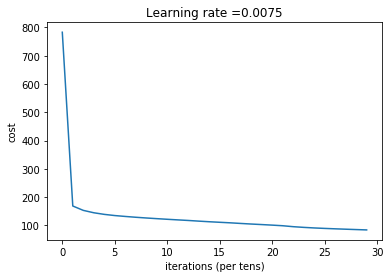

{'W1': array([[ 1.80079583,  0.35319705],
        [-0.4655424 , -1.68817964],
        [-0.43058423, -0.30065297],
        [-0.01458692, -0.59346876],
        [ 0.43431137, -0.98229572],
        [-0.79963207,  1.30381976],
        [ 0.92299116,  1.6912455 ],
        [-0.01846461, -0.44198874],
        [-0.54341161, -1.57818906],
        [ 1.02236778, -1.01675511],
        [-1.36800723,  0.01632185],
        [ 1.45897339,  0.205111  ],
        [-0.77954772, -0.83410937],
        [ 0.64319775, -0.21631725],
        [-0.86808622,  0.31073377],
        [ 0.82859294,  1.90464769],
        [-1.21395716, -0.81695794],
        [-0.77730675, -2.49935834],
        [-0.93979574, -1.13305514],
        [ 1.10088088, -0.00612504]]),
 'W2': array([[-1.62328545e+00,  5.85296683e-01, -3.70598412e-01,
         -1.75996328e+00, -5.96670757e-01, -4.05383503e-01,
         -8.42019177e-01,  2.46510987e-02, -2.31161737e+00,
         -2.69131234e-01,  1.06878350e+00,  8.52797841e-01,
          1.07774681e+00, 

In [0]:
#print(X_train.shape)

L_layer_model(X_train,np.array(Y_train), layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=True)

In [0]:
np.array([Y_train]).shape

(1, 280, 1)

## Часть 3. Параметры и гиперпараметры модели

Мы уже поговорили о том, как происходит обучение модели: для этого используются различные методы минимизации функции ошибки с помощью обновления параметров $w$ и $b$. Однако модель описывается не только этими параметрами.

Learning rate $\alpha$, кол-во слоёв в нейросети, кол-во нейронов в каждом слое, кол-во итераций обучения необходимы для описания модели. Такие параметры называются **гиперпараметрами**, они не настраиваются с помощью градиентного спуска во время обучения (это важно), а задаются экспертом. Тем не менее, в итоге гиперпараметры влияют на конечную модель, то есть на конечные значения $w$ и $b$, поэтому очень важно их правильно подбирать. Подробнее о выборе гиперпараметров мы поговорим в следующий раз.